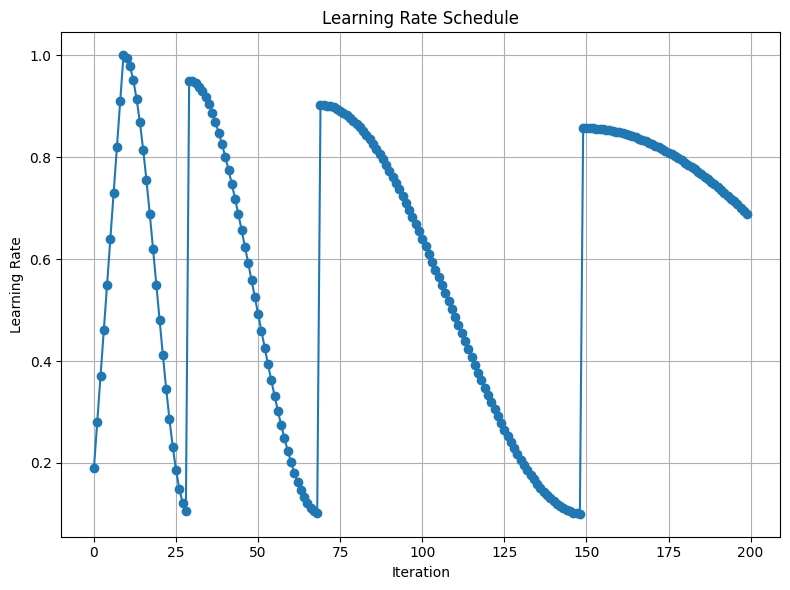

In [5]:
import sys
module_root = '..'
if module_root not in sys.path:
  sys.path.insert(0, module_root)
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR
import src.cosine_annealing_warm_restarts_decay as CD
import src.cosine_annealing_warm_restarts_decay_warmup as CDW
from importlib import reload
reload(CD)
reload(CDW)
from torch.optim.adamw import AdamW
from torch.nn import Linear
from typing import List
import torch
import matplotlib.pyplot as plt

model = Linear(4, 3, bias=False, dtype=torch.float32)
optim = AdamW(model.parameters(), lr=1)

# TODO: figure out why the cosine schedules don't tolerate eta_min being lower than lr
# TODO: figure out why my linear warmup's understanding of lr<1 is different than what the cosine schedules do

# sched = CosineAnnealingLR(optim, T_max = 10)
# doesn't tolerate eta_min's being lower than lr
# sched = CosineAnnealingWarmRestarts(optim, T_0=10, T_mult=2, eta_min=0.101)
# sched = CD.CosineAnnealingWarmRestartsDecay(optim, T_0=20, decay=.9, T_mult=2, eta_min=0.2)
sched = CDW.CosineAnnealingWarmRestartsDecayWarmup(optim, warmup=10, T_0=20, decay=.95, T_mult=2, eta_min=0.1)

lrs: List[int] = []
for step in range(200):
  optim.step()
  sched.step()
  lrs.append(optim.param_groups[0]['lr'])

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.plot(lrs, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()  # Optional: Improve spacing
plt.show()